In [100]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mpl_dates
import numpy as np
import matplotlib.pyplot as plt
from pandas.tseries.holiday import USFederalHolidayCalendar as calendar
from IPython.display import HTML
from pandas.api.types import CategoricalDtype
import squarify # pip install squarify
from sklearn.impute import SimpleImputer
from numpy import nan
from sklearn.metrics import mean_squared_error 
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import max_error
from sklearn.metrics import median_absolute_error
from sklearn.metrics import r2_score
from sklearn.impute import KNNImputer

In [101]:
#Reading the CSV file of the Kaggle dataset (Saudi Arabia Used Cars Dataset)
df=pd.read_csv('UsedCarsSA_Clean_EN.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8035 entries, 0 to 8034
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Make         8035 non-null   object 
 1   Type         8035 non-null   object 
 2   Year         8035 non-null   int64  
 3   Origin       8035 non-null   object 
 4   Color        8035 non-null   object 
 5   Options      8035 non-null   object 
 6   Engine_Size  8035 non-null   float64
 7   Fuel_Type    8035 non-null   object 
 8   Gear_Type    8035 non-null   object 
 9   Mileage      8035 non-null   int64  
 10  Region       8035 non-null   object 
 11  Price        8035 non-null   int64  
 12  Negotiable   8035 non-null   bool   
dtypes: bool(1), float64(1), int64(3), object(8)
memory usage: 761.3+ KB


In [102]:
#Summurizing the dataframe
df.describe()

,Year,Engine_Size,Mileage,Price
count,8035.000000,8035.000000,8.035000e+03,8.035000e+03
mean,2014.097698,3.287729,1.491488e+05,5.369984e+04
std,5.757228,1.517747,3.474480e+05,7.198472e+04
min,1963.000000,1.000000,1.000000e+02,0.000000e+00
25%,2012.000000,2.000000,3.700000e+04,0.000000e+00
50%,2016.000000,3.000000,1.019600e+05,3.700000e+04
75%,2018.000000,4.400000,1.950000e+05,7.375000e+04
max,2022.000000,9.000000,2.000000e+07,1.150000e+06


In [103]:
#Print the first five rows of the dataframe
df.head()

,Make,Type,Year,Origin,Color,Options,Engine_Size,Fuel_Type,Gear_Type,Mileage,Region,Price,Negotiable
0,Chrysler,C300,2018,Saudi,Black,Full,5.7,Gas,Automatic,103000,Riyadh,114000,False
1,Nissan,Patrol,2016,Saudi,White,Full,4.8,Gas,Automatic,5448,Riyadh,0,True
2,Nissan,Sunny,2019,Saudi,Silver,Standard,1.5,Gas,Automatic,72418,Riyadh,27500,False
3,Hyundai,Elantra,2019,Saudi,Grey,Standard,1.6,Gas,Automatic,114154,Riyadh,43000,False
4,Hyundai,Elantra,2019,Saudi,Silver,Semi Full,2.0,Gas,Automatic,41912,Riyadh,59500,False


# Data Analysis and exploration 
Here I will explore and analyze the used cars data in order to know the data well and try to produce some insights

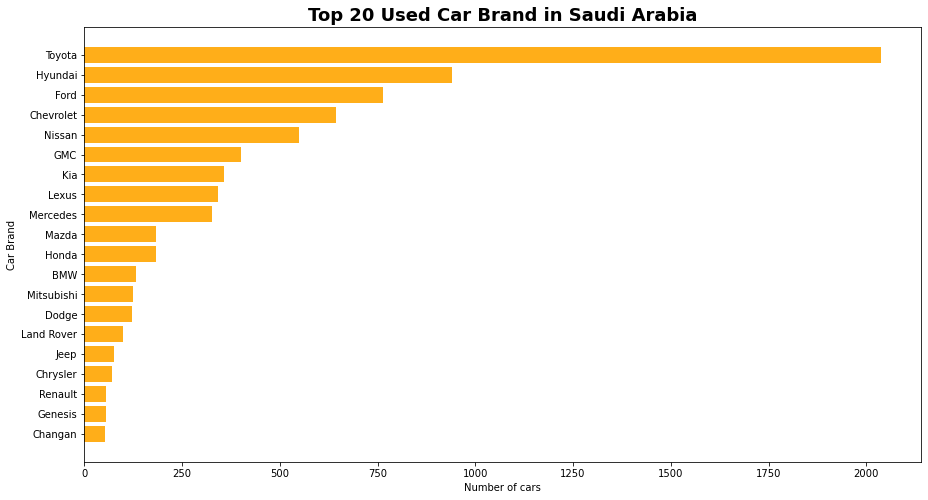

In [105]:
# Get 20 most common used car barnd in the dataset
most_common_car_brand = df['Make'].value_counts()[0:20].sort_values()
most_common_car_brand.values

#Get the indeies of the car_brand
car_brand = most_common_car_brand.index
#Get the values of the car_brand rows
counts = most_common_car_brand.values

#Draw the figure with determine the width and height of the figure
fig = plt.figure(figsize = (15, 8))

#Creating bar plot hirozentaly
plt.barh(Car_total, counts, align='center', alpha=0.9, color='orange')
plt.yticks(Car_total, car_brand)
plt.xlabel('Number of cars')
plt.ylabel('Car Brand')
plt.title("Top 20 Used Car Brand in Saudi Arabia",fontsize=18, fontweight='bold')
plt.show()

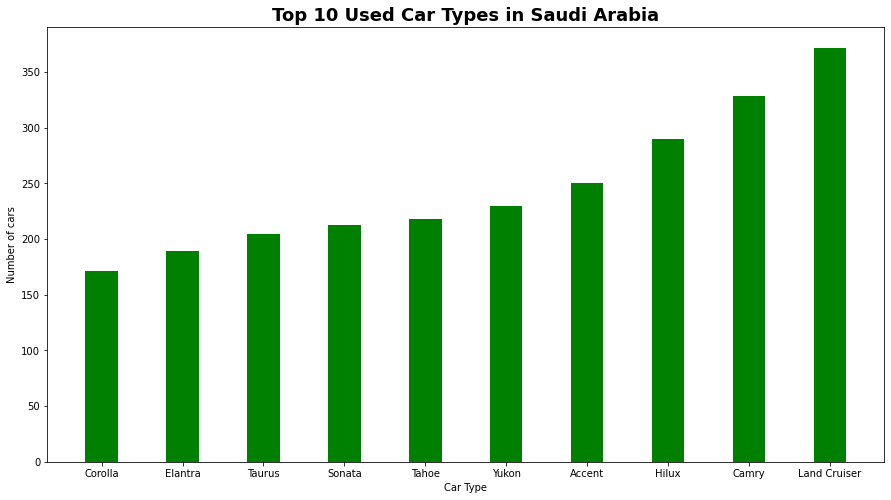

In [106]:
# Get 10 most common used car type in the dataset
most_common_car_type = df['Type'].value_counts()[0:10].sort_values()
most_common_car_type.values

#Finding the indices and the values of the 10 most common used cars 
car_type = most_common_car_type.index
counts = most_common_car_type.values

#Determine the figuer width and height
fig = plt.figure(figsize = (15, 8))

# creating the bar plot
plt.bar(car_type, counts, color ='green', width = 0.4)
plt.xlabel("Car Type")
plt.ylabel("Number of cars")
plt.title("Top 10 Used Car Types in Saudi Arabia",fontsize=18, fontweight='bold')
plt.show()

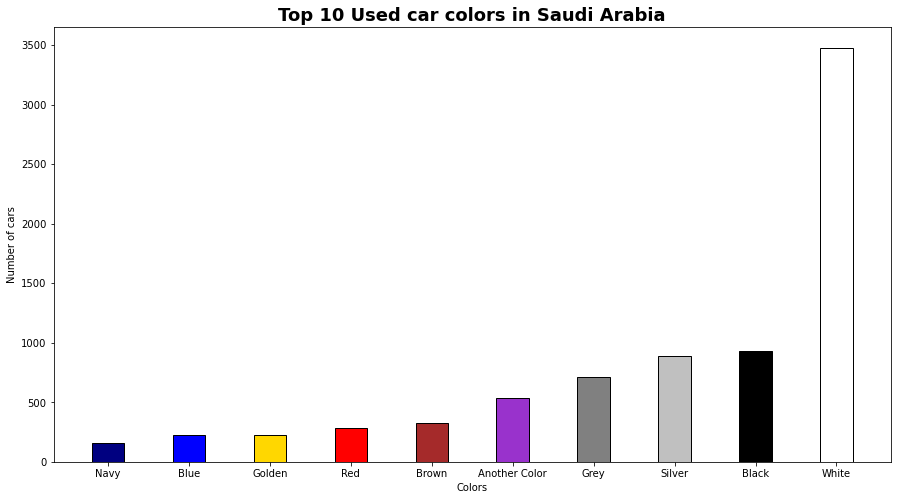

In [107]:
#Most 10 common used car color in the dataset
most_common_color = df['Color'].value_counts()[0:10].sort_values()
most_common_color.values

#Finding the indices and the values of the 10 most common used cars colors
car_color = most_common_color.index
counts = most_common_color.values
#Determine the colors  of the bars Because I run it before and I knew the color of each bar
colors= ['Navy', 'blue', 'gold', 'red', 'brown','darkorchid','grey','silver','black','white']
#Determine the figuer width and height
fig = plt.figure(figsize = (15, 8))
# creating the bar plot
plt.bar(car_color, counts, color =colors,width = 0.4, edgecolor = 'black')
plt.xlabel("Colors")
plt.ylabel("Number of cars")
plt.title("Top 10 Used car colors in Saudi Arabia",fontsize=18, fontweight='bold')
plt.show()


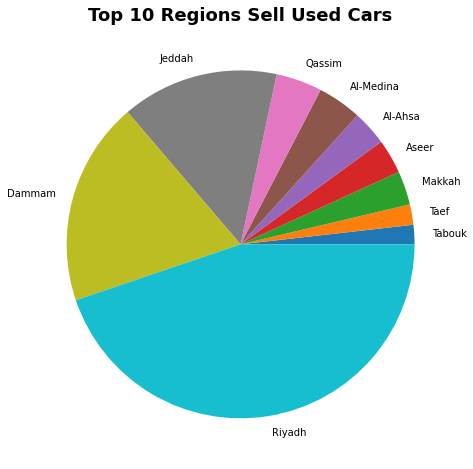

In [108]:
#Most 10 common regions of Saudi Arabia showed used cars for sale
most_common_region = df['Region'].value_counts()[0:10].sort_values()
most_common_region.values

#Finding the indices and the values of the 10 most common regions
car_region = most_common_region.index
counts = most_common_region.values
#Determine the figuer width and height
fig = plt.figure(figsize = (15, 8))
#Creating pie chart of the most common regions
plt.title('Top 10 Regions Sell Used Cars',fontsize=18, fontweight='bold')
plt.pie(counts, labels = car_region)

plt.show() 

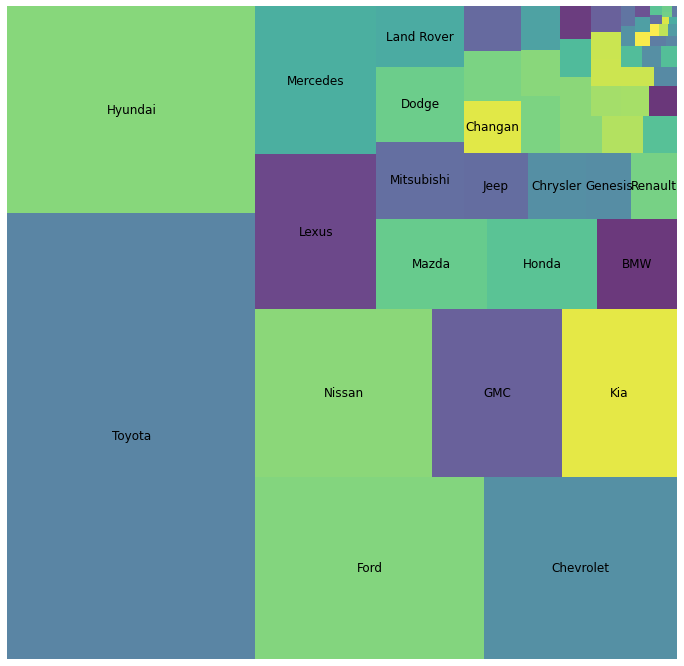

In [109]:
#Distribution of used car barnd in the dataset
most_common_car_brand = df['Make'].value_counts().sort_values(ascending=False)


#Finding the indices and the values of the all of car brands
car_brand = most_common_car_brand.index
counts = most_common_car_brand.values
#Determine the figure height and width
fig, ax = plt.subplots(1, figsize = (12,12))
#Using Squarify to create a tree map of al car barnds
squarify.plot(sizes=counts,label=car_brand[0:20], alpha=.8, text_kwargs={'color':'black', 'size':12})
plt.axis('off')
plt.show()

# Missing Data Imputation
Actualy there is no Nan values in the dataset, but there are car with price(0) and (1) and that is not make sense so I am going to deal with these prices. It is important to know the zero value of car's price in the dataset because the owner would like to negotiate the price with the buyer. In order to know which data missing imputer is good for the data, so I will examine four imputers: mean, median, most frequent, and KNN. I created a copy of the dataset and I add two columns "Missing_Price" and I chose from column (Type) a car named (Camery) because it has most rows with non zero values. Then, I manually delete random values of the new column which I created "Missing_Price" and fit this column in each imputer and see the results of the evaluation methods.


In [98]:
df4=pd.read_csv('UsedCarsSA_Clean_EN04.csv')
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Column1        55 non-null     int64  
 1   Make           55 non-null     object 
 2   Type           55 non-null     object 
 3   Year           55 non-null     int64  
 4   Origin         55 non-null     object 
 5   Color          55 non-null     object 
 6   Options        55 non-null     object 
 7   Engine_Size    55 non-null     float64
 8   Fuel_Type      55 non-null     object 
 9   Gear_Type      55 non-null     object 
 10  Mileage        55 non-null     int64  
 11  Region         55 non-null     object 
 12  Price          55 non-null     int64  
 13  Negotiable     55 non-null     bool   
 14  Missing_Price  41 non-null     float64
 15  Mileage_Scale  55 non-null     int64  
dtypes: bool(1), float64(2), int64(5), object(8)
memory usage: 6.6+ KB


In [110]:
#I use the first imputer "mean"
imputer=SimpleImputer(missing_values=np.nan,strategy='mean')
#Fit the missing_price column in the model
imr = imputer.fit(df4[['Missing_Price']])
df4['Price_mean_Imputation'] = imr.transform(df4[['Missing_Price']]).ravel()

In [111]:
#(y_valid) is the actual price and (preds) is the predicted price
y_valid=df4['Price']
preds=df4['Price_mean_Imputation']

#Max error evaluation method, it evaluates the 'mean' imputer
print("max error :", max_error(y_valid,preds))

#MSE evaluation method
MSE=mean_squared_error(y_valid,preds) 
print("mean squared error :", MSE)

#RMSE evaluation method
RMSE=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))
print("root-mean-square error :", RMSE)

#MAE evaluation method
MAE=mean_absolute_error(y_valid, preds)
print("mean_absolute_error:", MAE)

#R^2 Score evaluation method
print("R2_score:", r2_score(y_valid,preds))

max error : 71722.36585365853
mean squared error : 476574399.9702126
root-mean-square error : 21830.58405013967
mean_absolute_error: 10067.894456762748
R2_score: 0.5845549050487691


In [70]:
#I use the second imputer "median"
imputer=SimpleImputer(missing_values=np.nan,strategy='median')
#Fit the data in the model
imr = imputer.fit(df4[['Missing_Price']])
df4['Price_median_Imputation'] = imr.transform(df4[['Missing_Price']]).ravel()

In [71]:
#(y_valid) is the actual price and (preds) is the predicted price
y_valid=df4['Price']
preds=df4['Price_median_Imputation']


print("max error :", max_error(y_valid,preds))

MSE=mean_squared_error(y_valid,preds) 
print("mean squared error :", MSE)
RMSE=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))

print("root-mean-square error :", RMSE)
MAE=mean_absolute_error(y_valid, preds)

print("mean_absolute_error:", MAE)


print("R2_score:", r2_score(y_valid,preds))

max error : 71000.0
mean squared error : 469942909.09090906
root-mean-square error : 21678.16664505809
mean_absolute_error: 9989.09090909091
R2_score: 0.5903357870226908


In [72]:
#I use the second imputer "most frequent"
imputer=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
#Training the model
imr = imputer.fit(df4[['Missing_Price']])
df4['Price_most_Frequent_Imputation'] = imr.transform(df4[['Missing_Price']]).ravel()

In [73]:
#(y_valid) is the actual price and (preds) is the predicted price
y_valid=df4['Price']
preds=df4['Price_most_Frequent_Imputation']


print("max error :", max_error(y_valid,preds))

MSE=mean_squared_error(y_valid,preds) 
print("mean squared error :", MSE)
RMSE=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))

print("root-mean-square error :", RMSE)
MAE=mean_absolute_error(y_valid, preds)

print("mean_absolute_error:", MAE)


print("R2_score:", r2_score(y_valid,preds))

max error : 71000.0
mean squared error : 469942909.09090906
root-mean-square error : 21678.16664505809
mean_absolute_error: 9989.09090909091
R2_score: 0.5903357870226908


In [84]:
##I use the second imputer "KNN"
from sklearn.impute import KNNImputer
imputer=KNNImputer(n_neighbors=3, weights="uniform")
imr = imputer.fit(df4[['Missing_Price']])
df4['Price_KNN_Imputation'] = imr.transform(df4[['Missing_Price']]).ravel()

In [85]:
#(y_valid) is the actual price and (preds) is the predicted price
y_valid=df4['Price']
preds=df4['Price_KNN_Imputation']


print("max error :", max_error(y_valid,preds))

MSE=mean_squared_error(y_valid,preds) 
print("mean squared error :", MSE)
RMSE=np.sqrt(np.mean(np.power((np.array(y_valid)-np.array(preds)),2)))

print("root-mean-square error :", RMSE)
MAE=mean_absolute_error(y_valid, preds)

print("mean_absolute_error:", MAE)


print("R2_score:", r2_score(y_valid,preds))

max error : 71722.36585365853
mean squared error : 476574399.9702126
root-mean-square error : 21830.58405013967
mean_absolute_error: 10067.894456762748
R2_score: 0.5845549050487691
